In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions

1.Import the necessary libraries.

2.Load the customer_value_analysis.csv into the variable customer_df.

3.First look at its main features (head, shape, info).

4.Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

5.Change the type of effective_to_date column to DateTime format.

6.Check NaN values per column.

7.Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

8. Drop any ID column.

9.Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

13.According to the previous histogram plots, do you think that you will have to apply any transformation?

14.Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [3]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
display(customer_df.shape)
display(customer_df.head())
print(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower())

customer_df.columns = cols

for colname in customer_df:
     customer_df.columns = customer_df.columns.str.replace(" ", "_")
        
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df["customer_lifetime_value"] = pd.to_datetime(customer_df["customer_lifetime_value"])

customer_df["customer_lifetime_value"].dtype

dtype('<M8[ns]')

In [6]:
customer_df.isnull().sum() ##no missing values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

.Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [7]:
def dfs_num_cat(df: pd.DataFrame):
    
    df_num = df.select_dtypes(include='number')

    df_cat = df.select_dtypes(include='object')

    return df_num, df_cat

numerical_df, categorical_df = dfs_num_cat(customer_df)

display(numerical_df.head())
display(categorical_df.head())

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


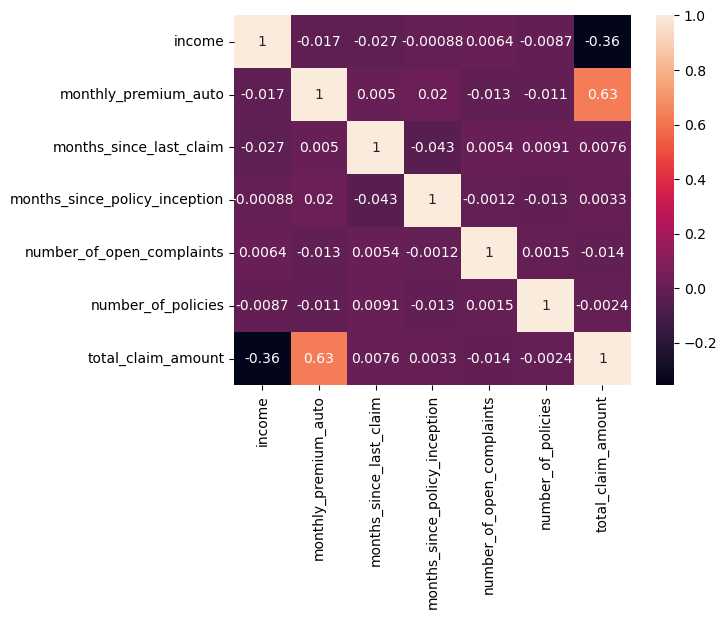

In [8]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##highest correlation between monthly premium auto and total claim amount
##Customers who pay higher premiums may be more likely to report and make claims for a number of reasons.
##some negative correlation between income and total claim amount

10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [9]:
def df_continuous_discrete(df: pd.DataFrame, threshold=36):
    continuous_cols = []
    discrete_cols = []
    
    for col in df.columns:
        unique_values = df[col].nunique()
        
        if unique_values <= threshold:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

continuous_df, discrete_df = df_continuous_discrete(numerical_df)

discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

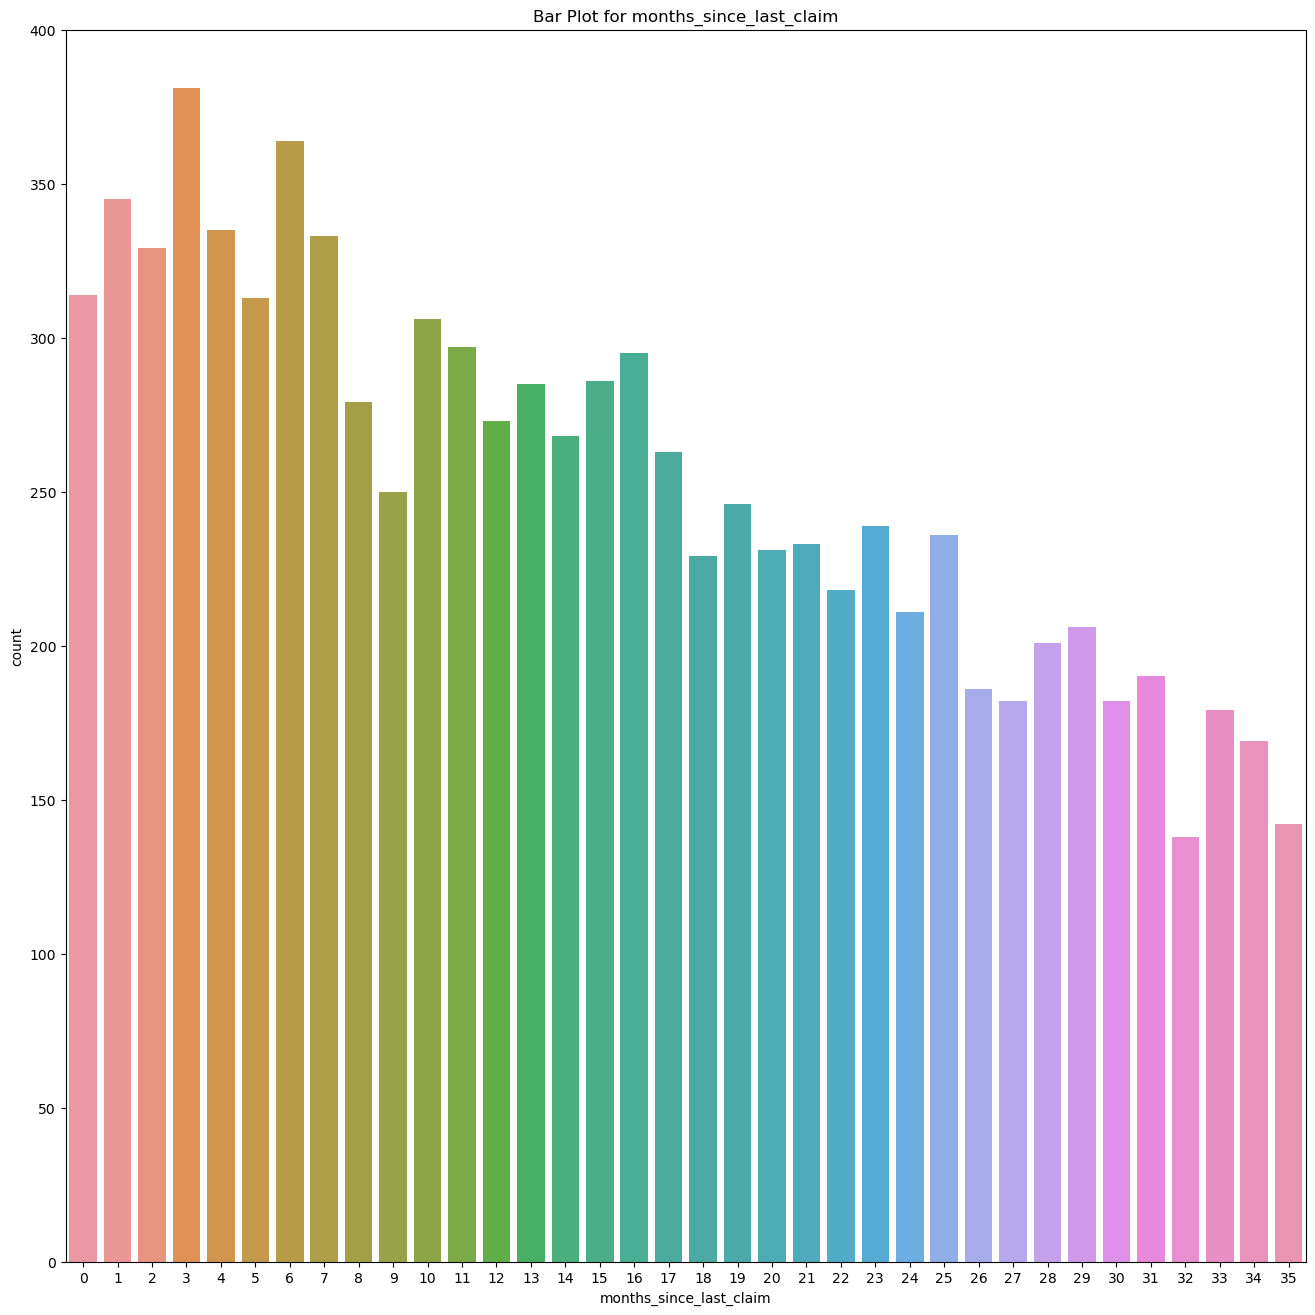

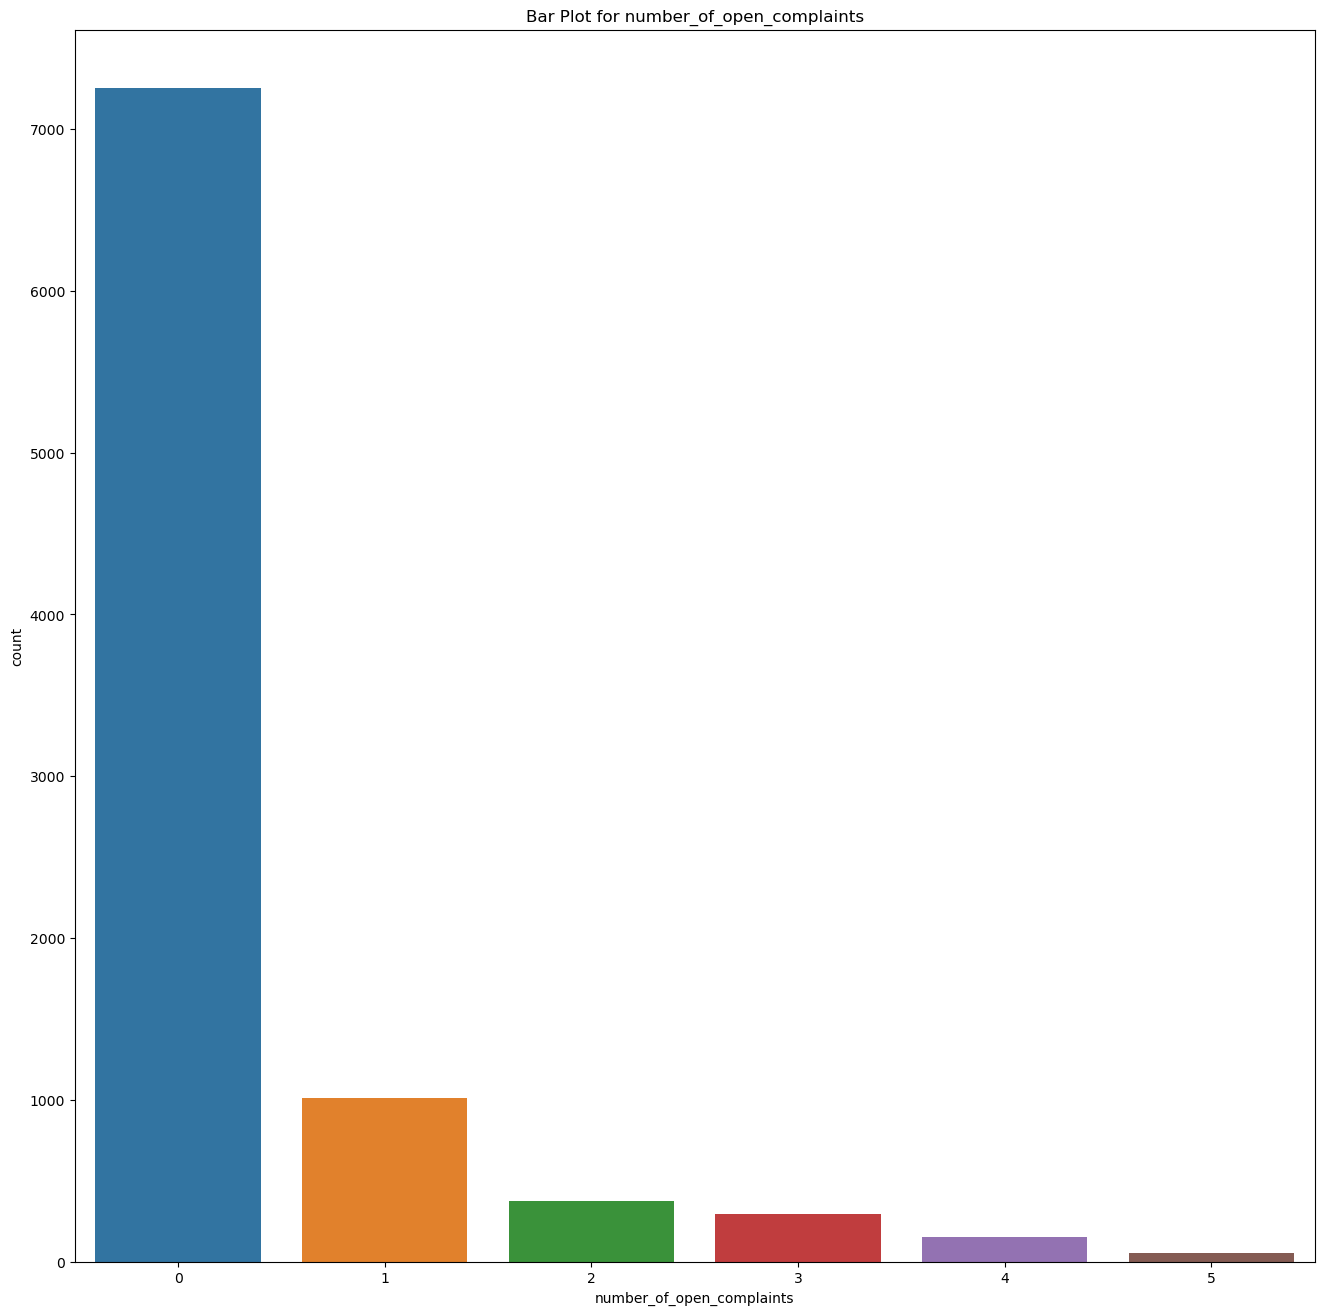

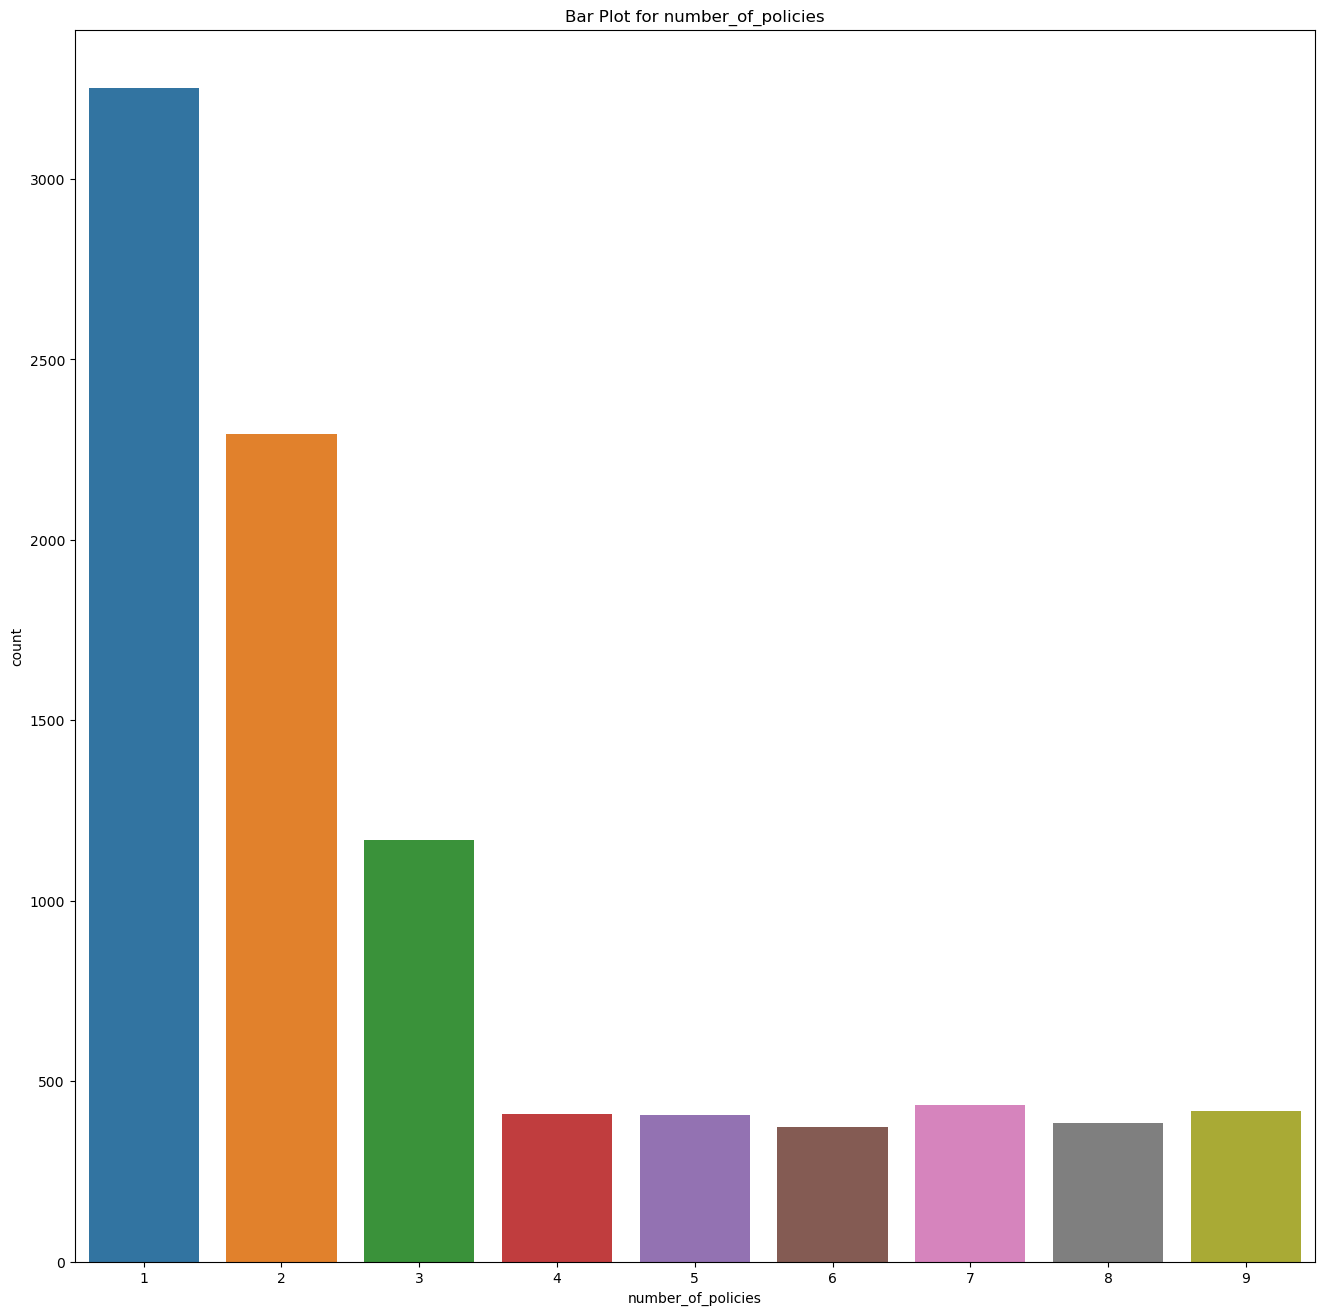

In [18]:
def plot_discrete(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Plot for {col}')
        plt.show()
        
        
plot_discrete(discrete_df)

12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

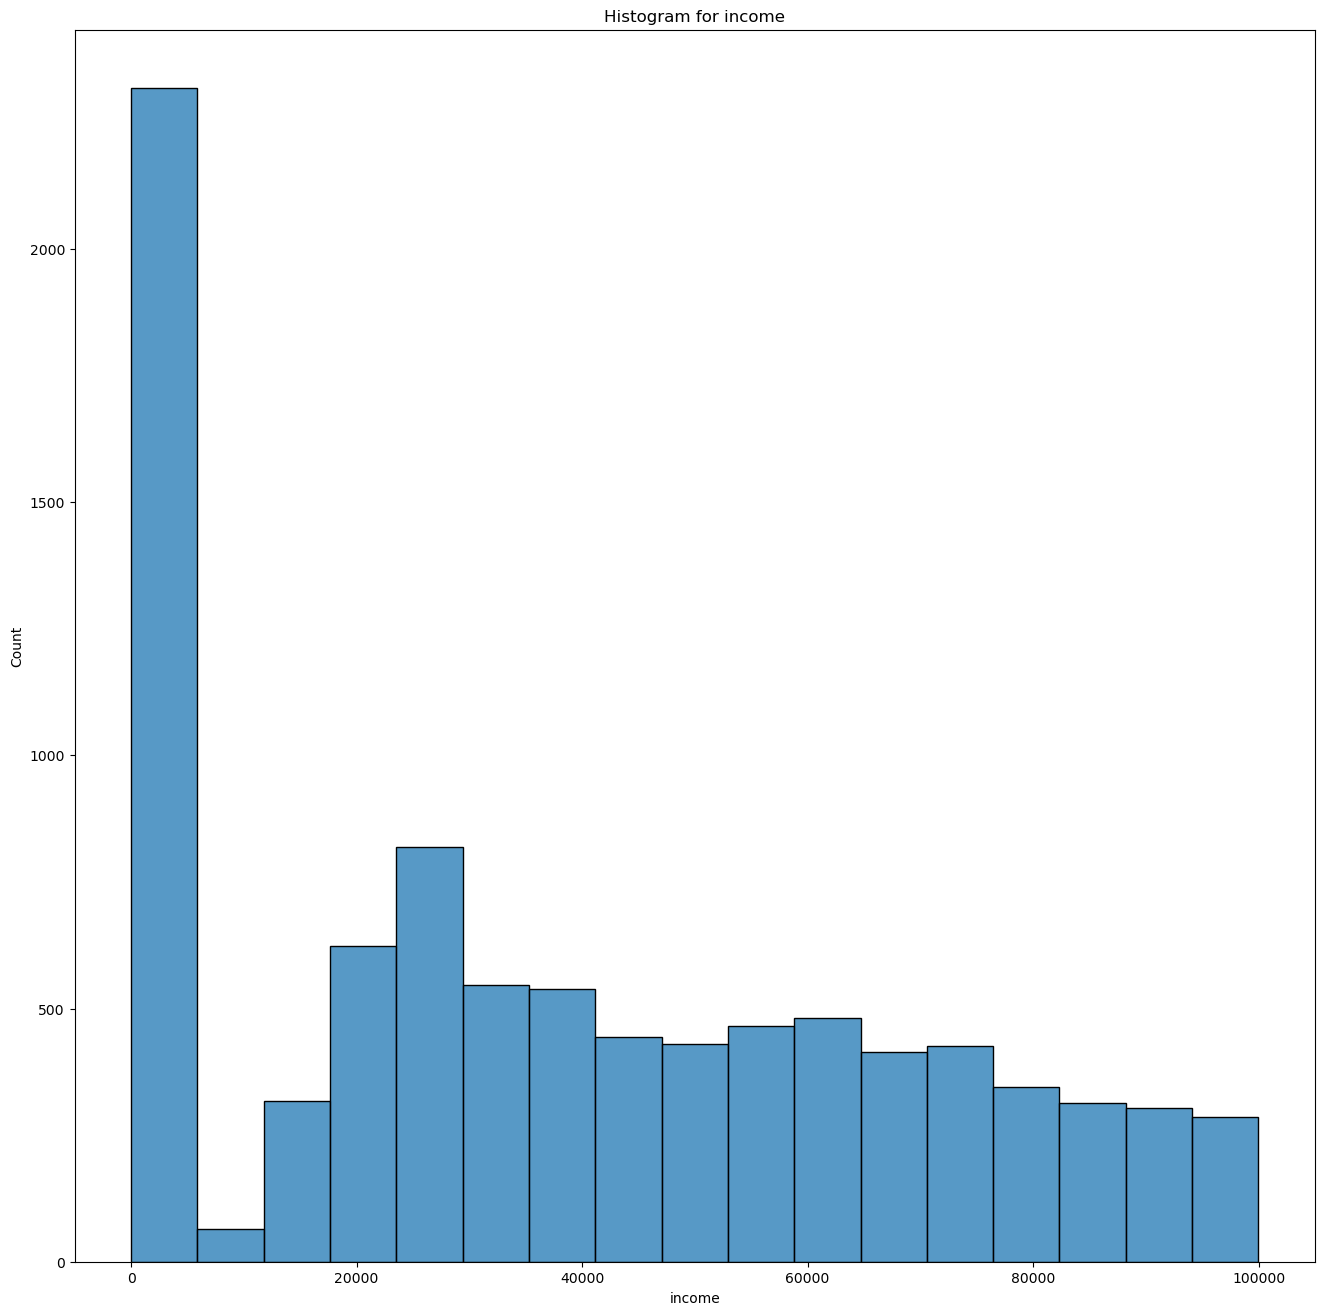

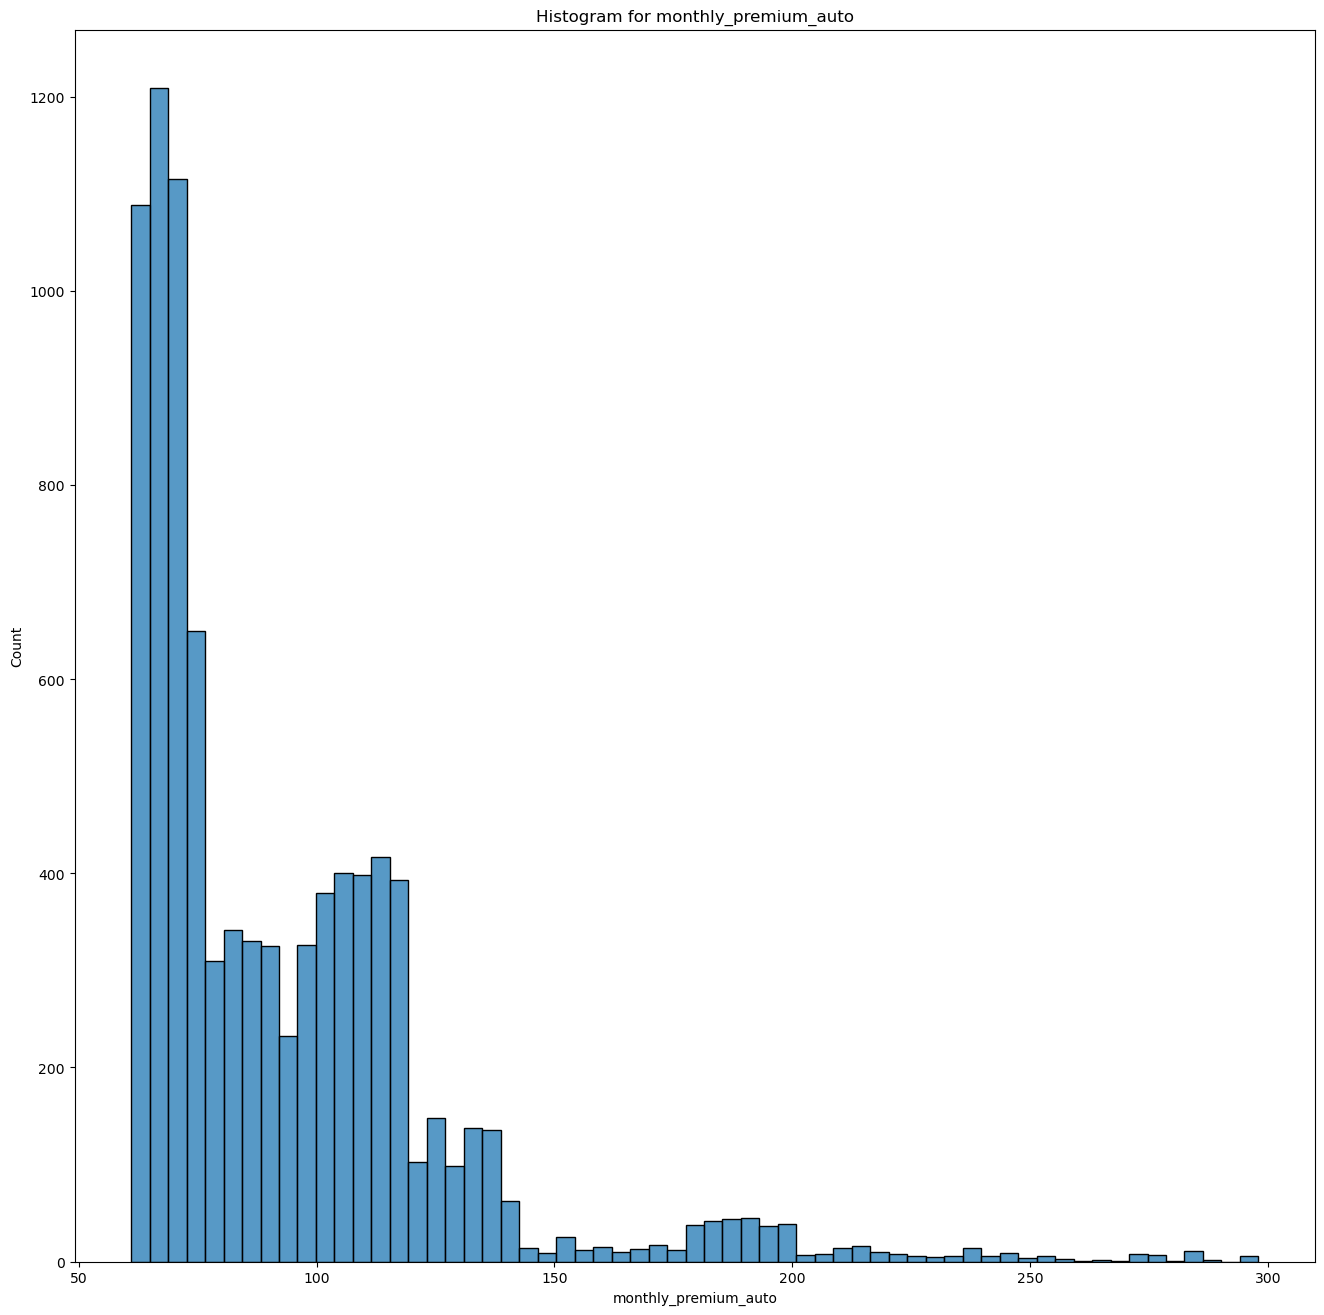

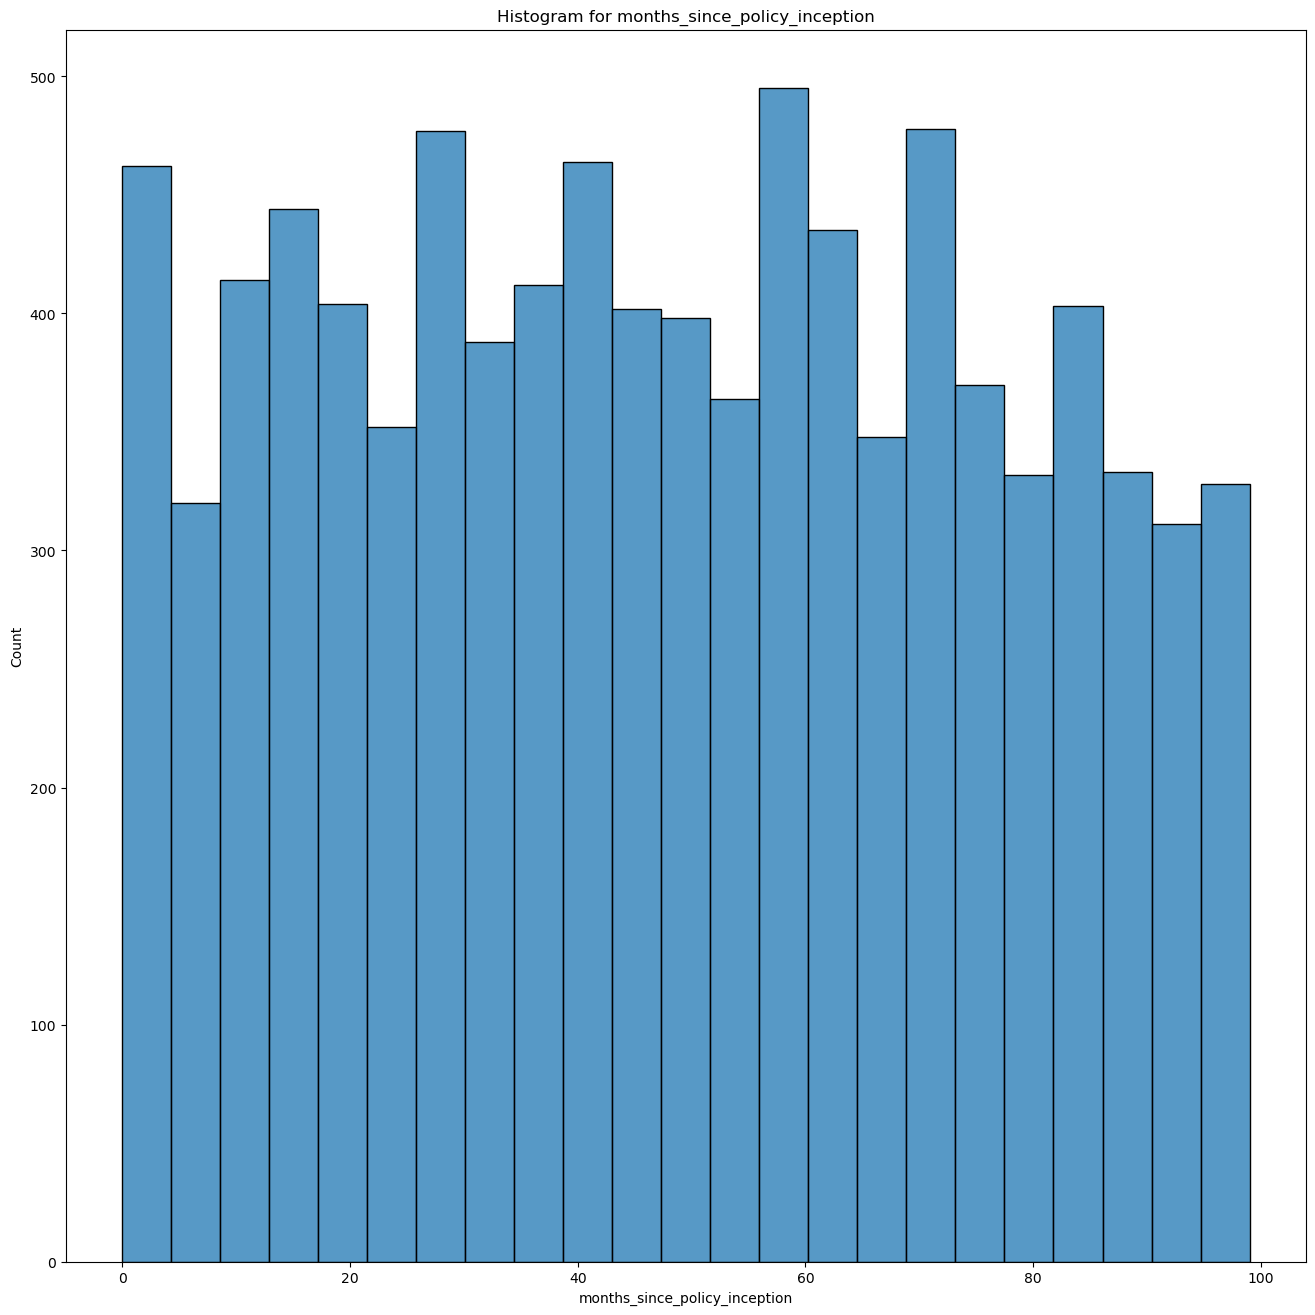

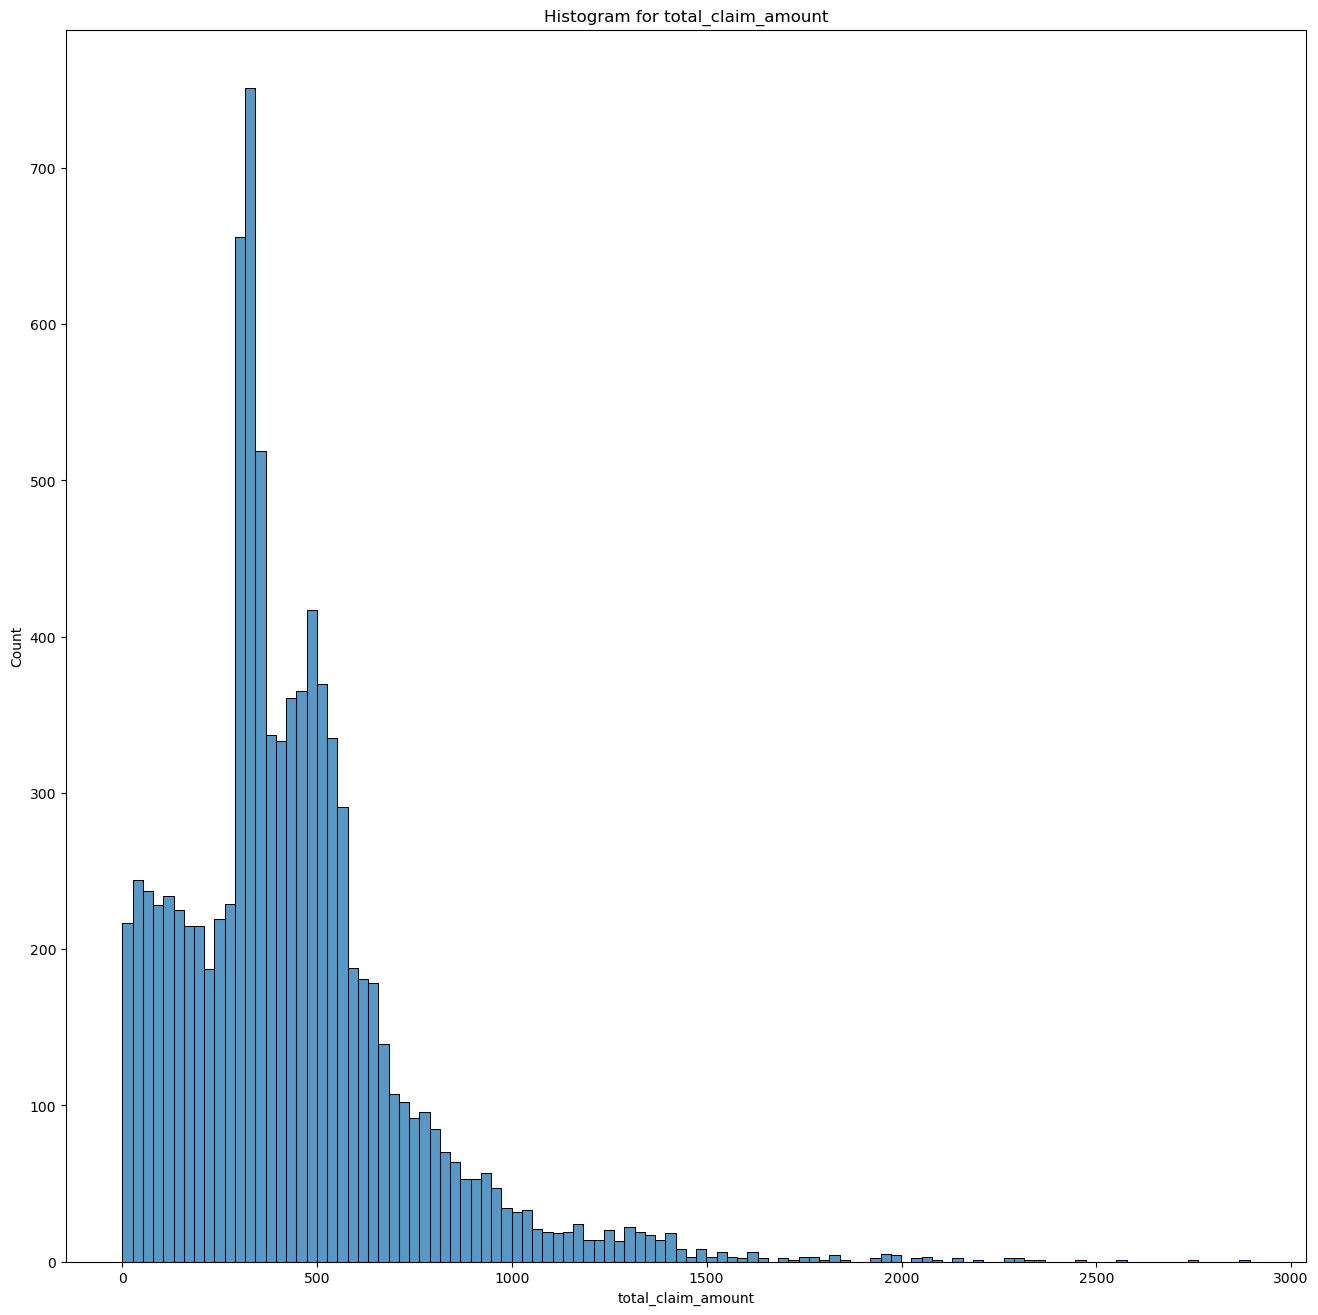

In [19]:
def hist_plot_continuous(df):
    for col in df.columns:
        plt.figure(figsize=(16, 16))
        sns.histplot(data=df, x=col)
        plt.title(f'Histogram for {col}')
        plt.show()
        
        
hist_plot_continuous(continuous_df)

13.According to the previous histogram plots, do you think that you will have to apply any transformation?


- total_claim_amount seems to have a lot of outliers on the higher numbers and is skewed

- months_since_policy_inception seems to be quite evenly distributed

- monthly_premium auto seems to need transformation too

- income seems not to have outliers


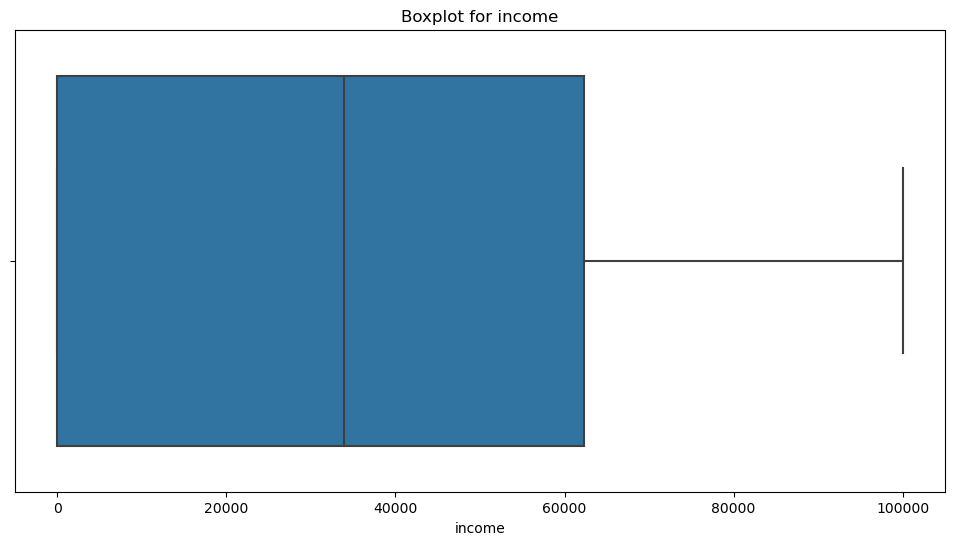

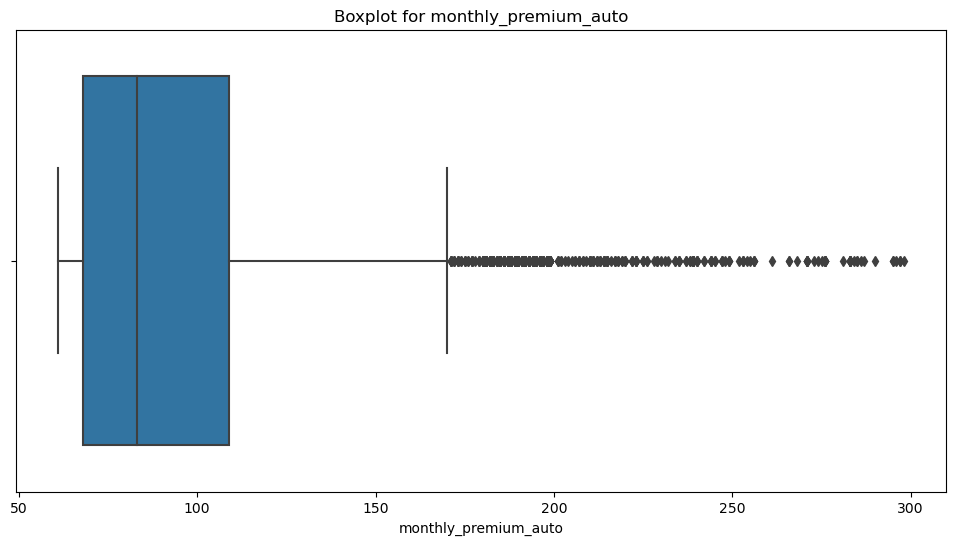

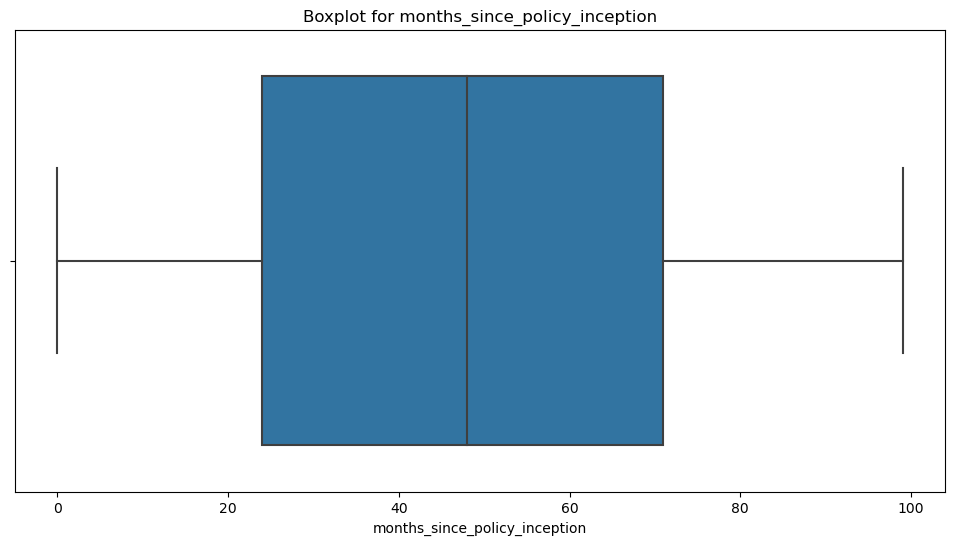

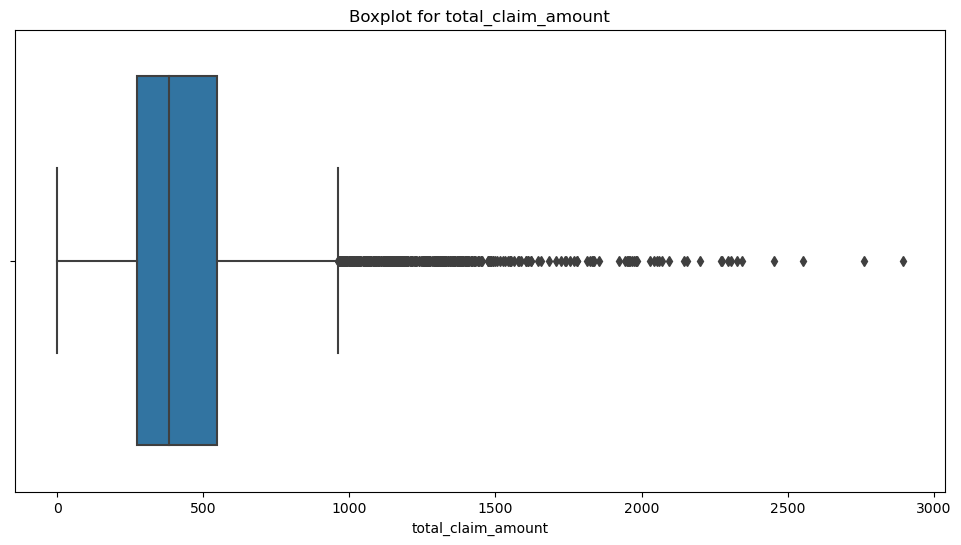

In [23]:
#14.Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

def box_plot_continuous(df):
    for col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()
        
        
box_plot_continuous(continuous_df)